In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## EDA and Pre-processing

### Loading Data

In [2]:
df_cars = pd.read_csv('cars-dataset.csv')
df_cars.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [3]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


### Handling Missing Values

In [4]:
print((df_cars[['cyl','disp','hp','wt','acc','yr','mpg']] == '0').sum())

cyl     0
disp    0
hp      0
wt      0
acc     0
yr      0
mpg     0
dtype: int64


In [5]:
print((df_cars[['cyl','disp','hp','wt','acc','yr','mpg']] == '?').sum())

cyl     0
disp    0
hp      6
wt      0
acc     0
yr      0
mpg     0
dtype: int64


In [6]:
df_cars['hp'] = df_cars['hp'].replace('?', np.nan)

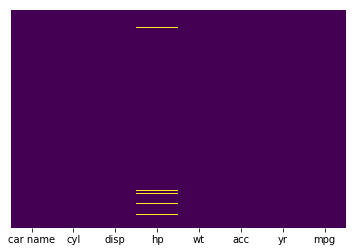

In [7]:
sns.heatmap(df_cars.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
df_cars['hp'] = df_cars['hp'].astype('float64')

In [9]:
# Going to Set HP's missing values with mean, grouped by cyl, instead of using overall mean 
df_mean_cyl = df_cars.groupby('cyl').mean()
df_mean_cyl

,disp,hp,wt,acc,yr,mpg
cyl,,,,,,
3,72.500000,99.250000,2398.500000,13.250000,75.500000,20.550000
4,109.796569,78.281407,2308.127451,16.601471,77.073529,29.286765
5,145.000000,82.333333,3103.333333,18.633333,79.000000,27.366667
6,218.142857,101.506024,3198.226190,16.263095,75.928571,19.985714
8,345.009709,158.300971,4114.718447,12.955340,73.902913,14.963107


In [10]:
for i in df_cars.index:
    if np.isnan(df_cars.at[i, 'hp']):
        df_cars.at[i, 'hp'] = df_mean_cyl[df_mean_cyl.index == df_cars.at[i, 'cyl']]['hp']

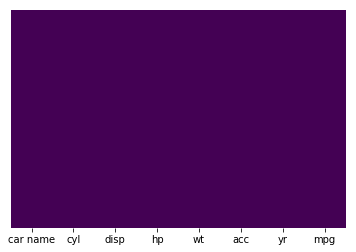

In [11]:
sns.heatmap(df_cars.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Handling outliers

In [12]:
def treat_outliers(col, df):
    q3 = df[col].quantile(0.75)
    q1 = df[col].quantile(0.25)
    iqr = q3 - q1
    lowval = q1 - 1.5* iqr
    highval = q3 + 1.5 * iqr
    loc_ret = df.loc[(df[col] > lowval) & (df[col] < highval)]
    return loc_ret

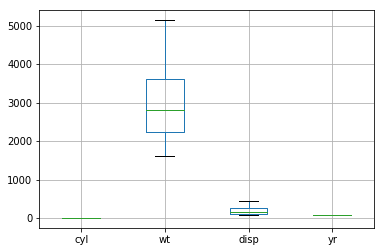

In [13]:
boxplot = df_cars.boxplot(column=['cyl','wt','disp','yr'])
# No outliers for the above mentionec columns

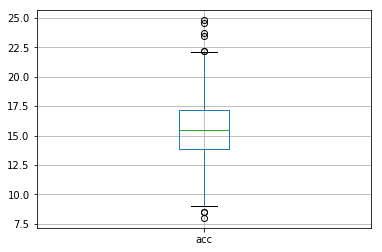

In [14]:
boxplot = df_cars.boxplot(column=['acc'])

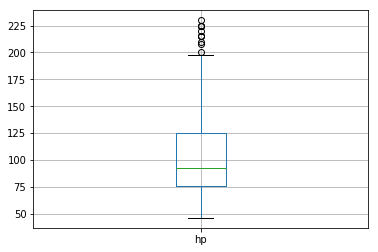

In [15]:
boxplot = df_cars.boxplot(column=['hp'])

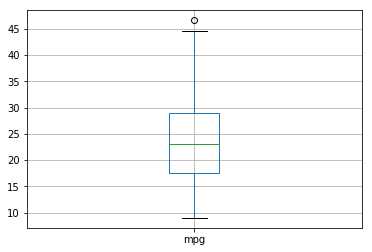

In [16]:
boxplot = df_cars.boxplot(column=['mpg'])

In [17]:
df_cars.shape

(398, 8)

In [18]:
df_cars = treat_outliers('mpg', df_cars)
df_cars.shape

(397, 8)

In [19]:
df_cars = treat_outliers('hp', df_cars)
df_cars.shape

(386, 8)

In [20]:
df_cars = treat_outliers('acc', df_cars)
df_cars.shape

(378, 8)

In [21]:
df_cars.groupby('car name').nunique().count()

car name    292
cyl         292
disp        292
hp          292
wt          292
acc         292
yr          292
mpg         292
dtype: int64

In [22]:
# Removing Car Name from the dataset. Out of 378 records, 292 are unique. 
# So it will not have any significance even if we change that column using any encoding techniques  
df_cars_n = df_cars.drop('car name', axis=1)

## Use pair plot or scatter matrix to visualize how the different variables are related

In [23]:
df_cars_n.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cyl,378.0,5.383598,1.663605,3.0,4.00,4.0,6.00,8.0
disp,378.0,187.525132,98.181259,68.0,104.25,144.5,256.00,429.0
hp,378.0,101.256384,33.137447,46.0,76.00,92.0,115.00,198.0
wt,378.0,2934.256614,823.258815,1613.0,2220.00,2764.5,3523.75,5140.0
acc,378.0,15.603704,2.448718,9.5,14.00,15.5,17.00,22.1
yr,378.0,76.145503,3.623896,70.0,73.00,76.0,79.00,82.0
mpg,378.0,23.687037,7.524666,9.0,18.00,23.0,29.00,44.6


In [24]:
df_cars_n.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,cyl,disp,hp,wt,acc,yr,mpg
cyl,1.0,0.96,0.86,0.89,-0.48,-0.3,-0.77
disp,0.96,1.0,0.89,0.94,-0.49,-0.31,-0.81
hp,0.86,0.89,1.0,0.88,-0.65,-0.35,-0.79
wt,0.89,0.94,0.88,1.0,-0.38,-0.26,-0.83
acc,-0.48,-0.49,-0.65,-0.38,1.0,0.22,0.36
yr,-0.3,-0.31,-0.35,-0.26,0.22,1.0,0.55
mpg,-0.77,-0.81,-0.79,-0.83,0.36,0.55,1.0


In [25]:
# From the correlation matrix, it's evident that 'cyl', 'displacement', 'hp' and 'weight' are all highly correlated
# As we have very limited features, without removing the highly correlated variables, we can try clustering 

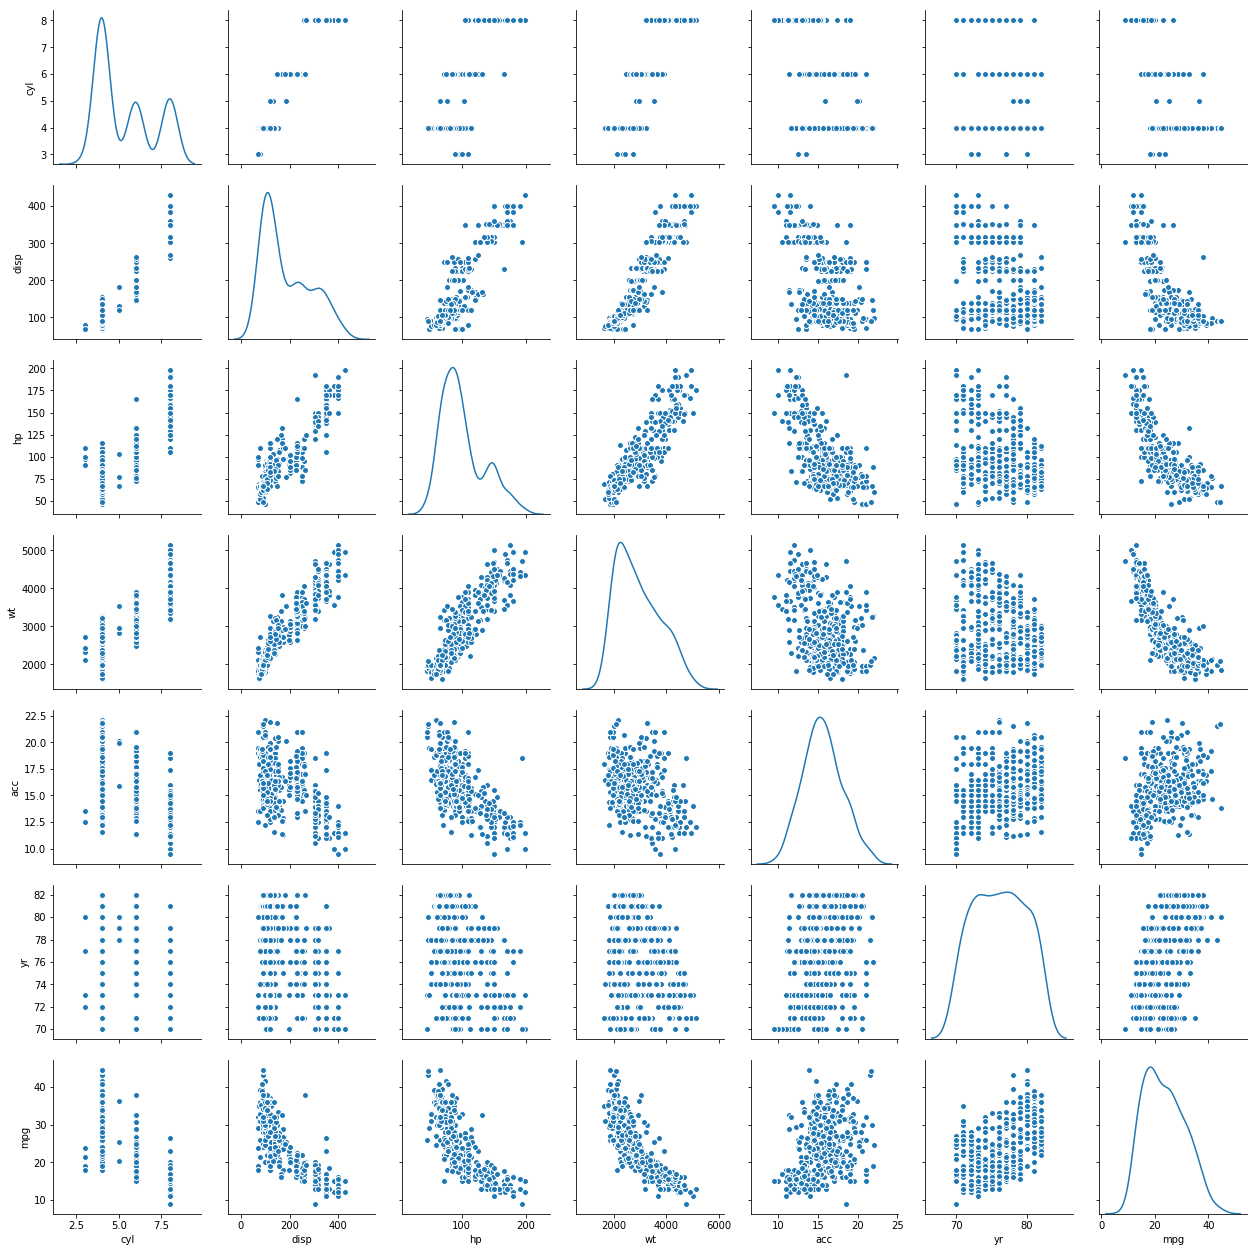

In [26]:
sns.pairplot(df_cars_n, diag_kind='kde')

In [27]:
# From the pairplot,based on number of gaussians for different features, clusters can be between 3 to 9 (3*3)

## Use K Means or Hierarchical clustering to find out the optimal no of clusters in the data. Identify and separate the clusters

In [28]:
from sklearn.cluster import KMeans

In [29]:
cluster_range = range(3, 13)   
# expecting 6 to 7 clusters from the pair panel visual inspection hence giving range from 3 to 12

In [30]:
def get_clusters(df, cluster_range):
    cluster_errors = []
    for num_clusters in cluster_range:
        clusters = KMeans(num_clusters, n_init=5, random_state=1)
        clusters.fit(df_cars_n)
        labels = clusters.labels_
        centroids = clusters.cluster_centers_
        cluster_errors.append(clusters.inertia_)
    clusters_df = pd.DataFrame({ "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
    return clusters_df

### First iteration with original dataset

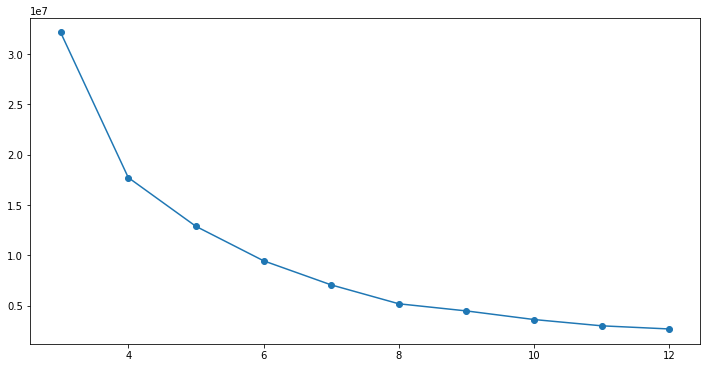

In [31]:
# Elbow plot
clusters_df_n = get_clusters(df_cars_n, cluster_range)
plt.figure(figsize=(12,6))
plt.plot( clusters_df_n.num_clusters, clusters_df_n.cluster_errors, marker = "o" )

In [32]:
# From elbow plot, we can say that optimal number of clusters are 7

In [33]:
cluster_n = KMeans(n_clusters=7, random_state=1)
cluster_n.fit(df_cars_n)
prediction_n = cluster_n.predict(df_cars_n)
df_cars_n["group"] = prediction_n     # Creating a new column "GROUP" which will hold the cluster id of each record

C:\AIML\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\AIML\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


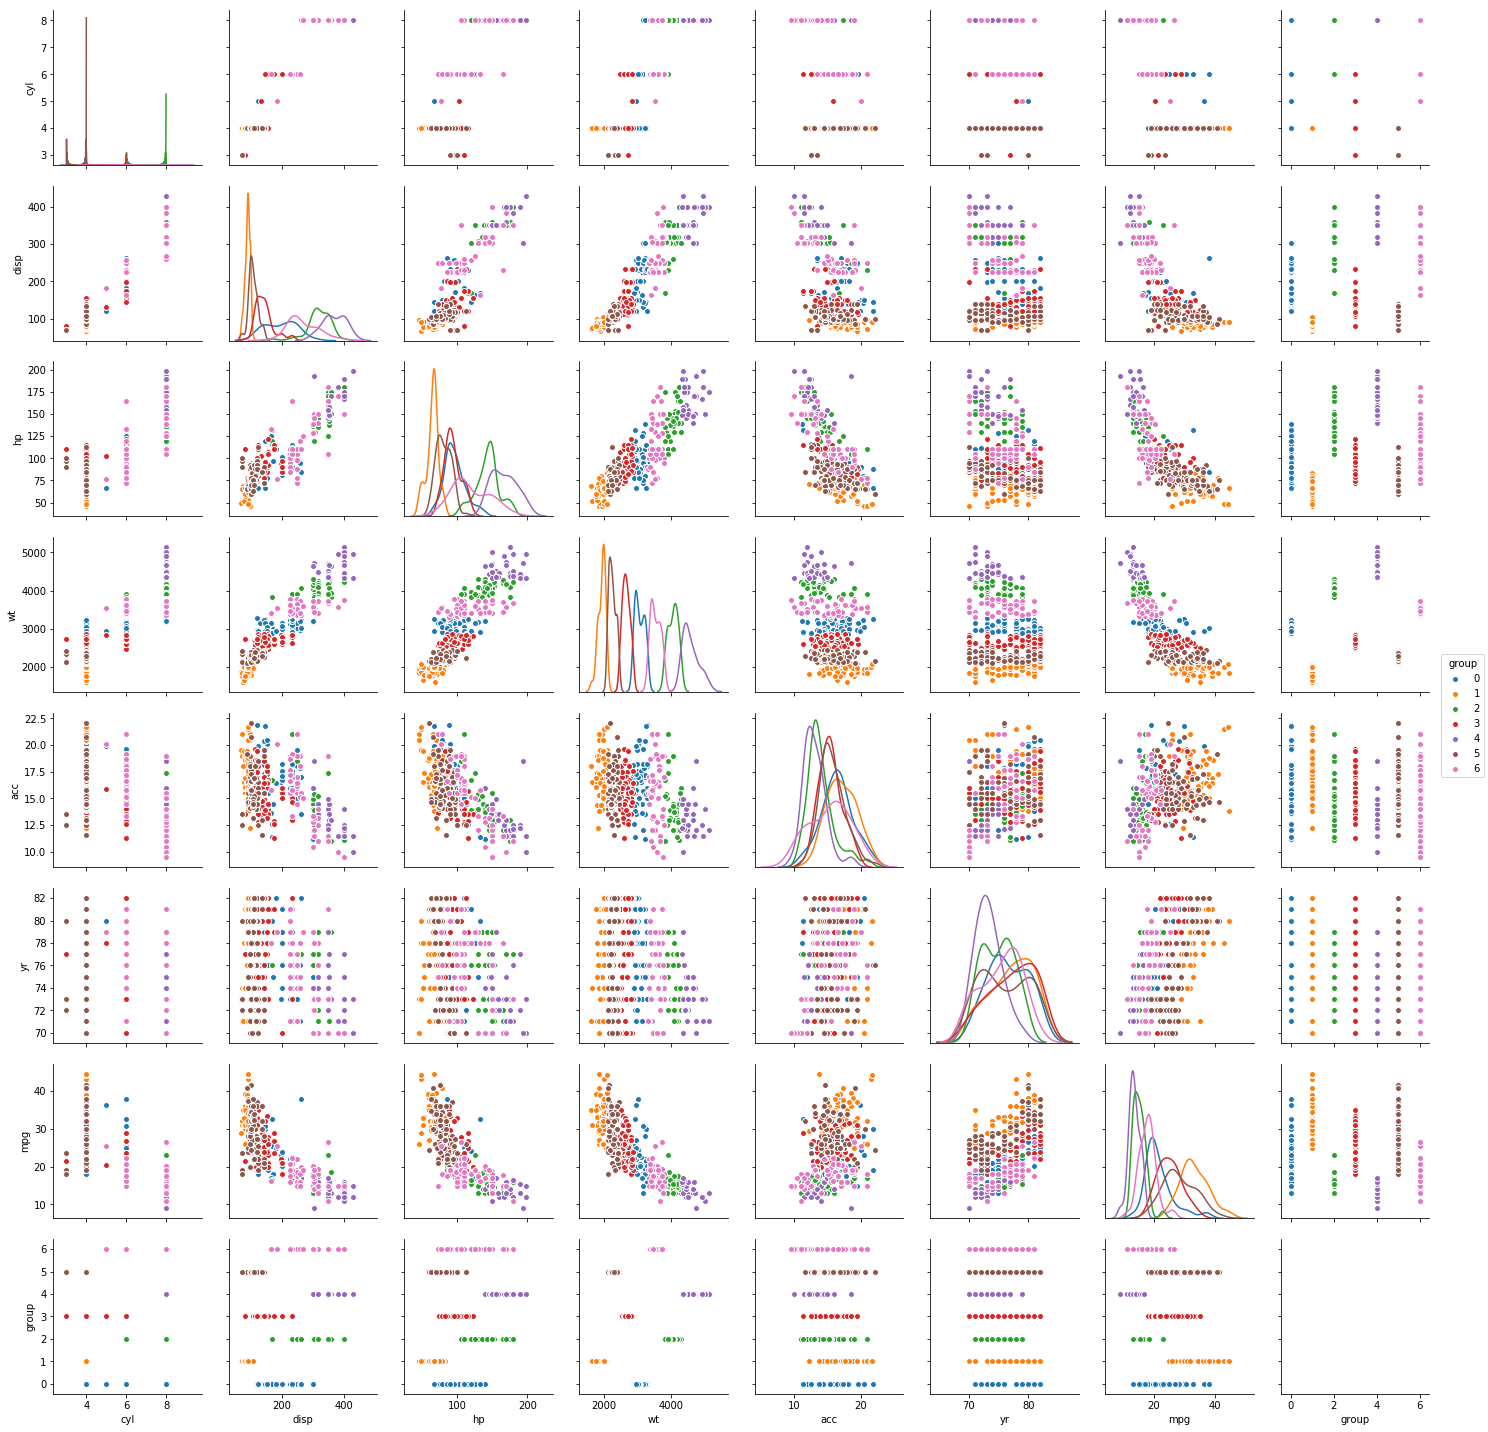

In [34]:
sns.pairplot(df_cars_n, diag_kind='kde',hue='group')

In [35]:
# From the pairplot against group, we can see clustering is done around the 'weight' feature

In [36]:
df_cars_n.groupby('group').count()

,cyl,disp,hp,wt,acc,yr,mpg
group,,,,,,,
0,56,56,56,56,56,56,56
1,59,59,59,59,59,59,59
2,41,41,41,41,41,41,41
3,65,65,65,65,65,65,65
4,28,28,28,28,28,28,28
5,78,78,78,78,78,78,78
6,51,51,51,51,51,51,51


### Second iteration with standardised dataset (with z-score)

In [37]:
from scipy.stats import zscore
df_cars_z = df_cars_n.apply(zscore)

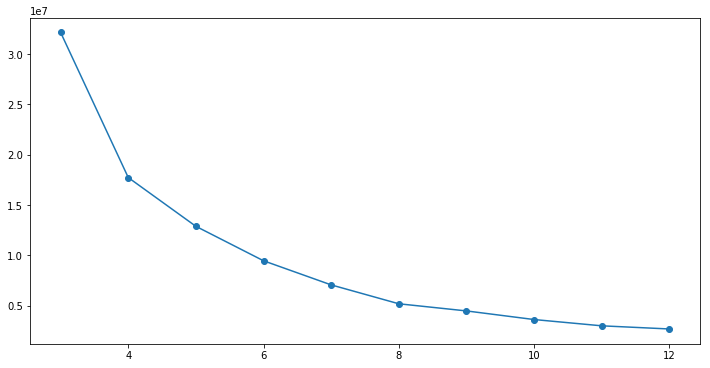

In [38]:
# Elbow plot
clusters_df_z = get_clusters(df_cars_z, cluster_range)
plt.figure(figsize=(12,6))
plt.plot( clusters_df_z.num_clusters, clusters_df_z.cluster_errors, marker = "o" )

In [39]:
# no of clusters could be 7
cluster_z = KMeans(n_clusters=7, random_state=1)
cluster_z.fit(df_cars_z)
prediction_z = cluster_z.predict(df_cars_z)
df_cars_z["group"] = prediction_z

C:\AIML\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\AIML\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


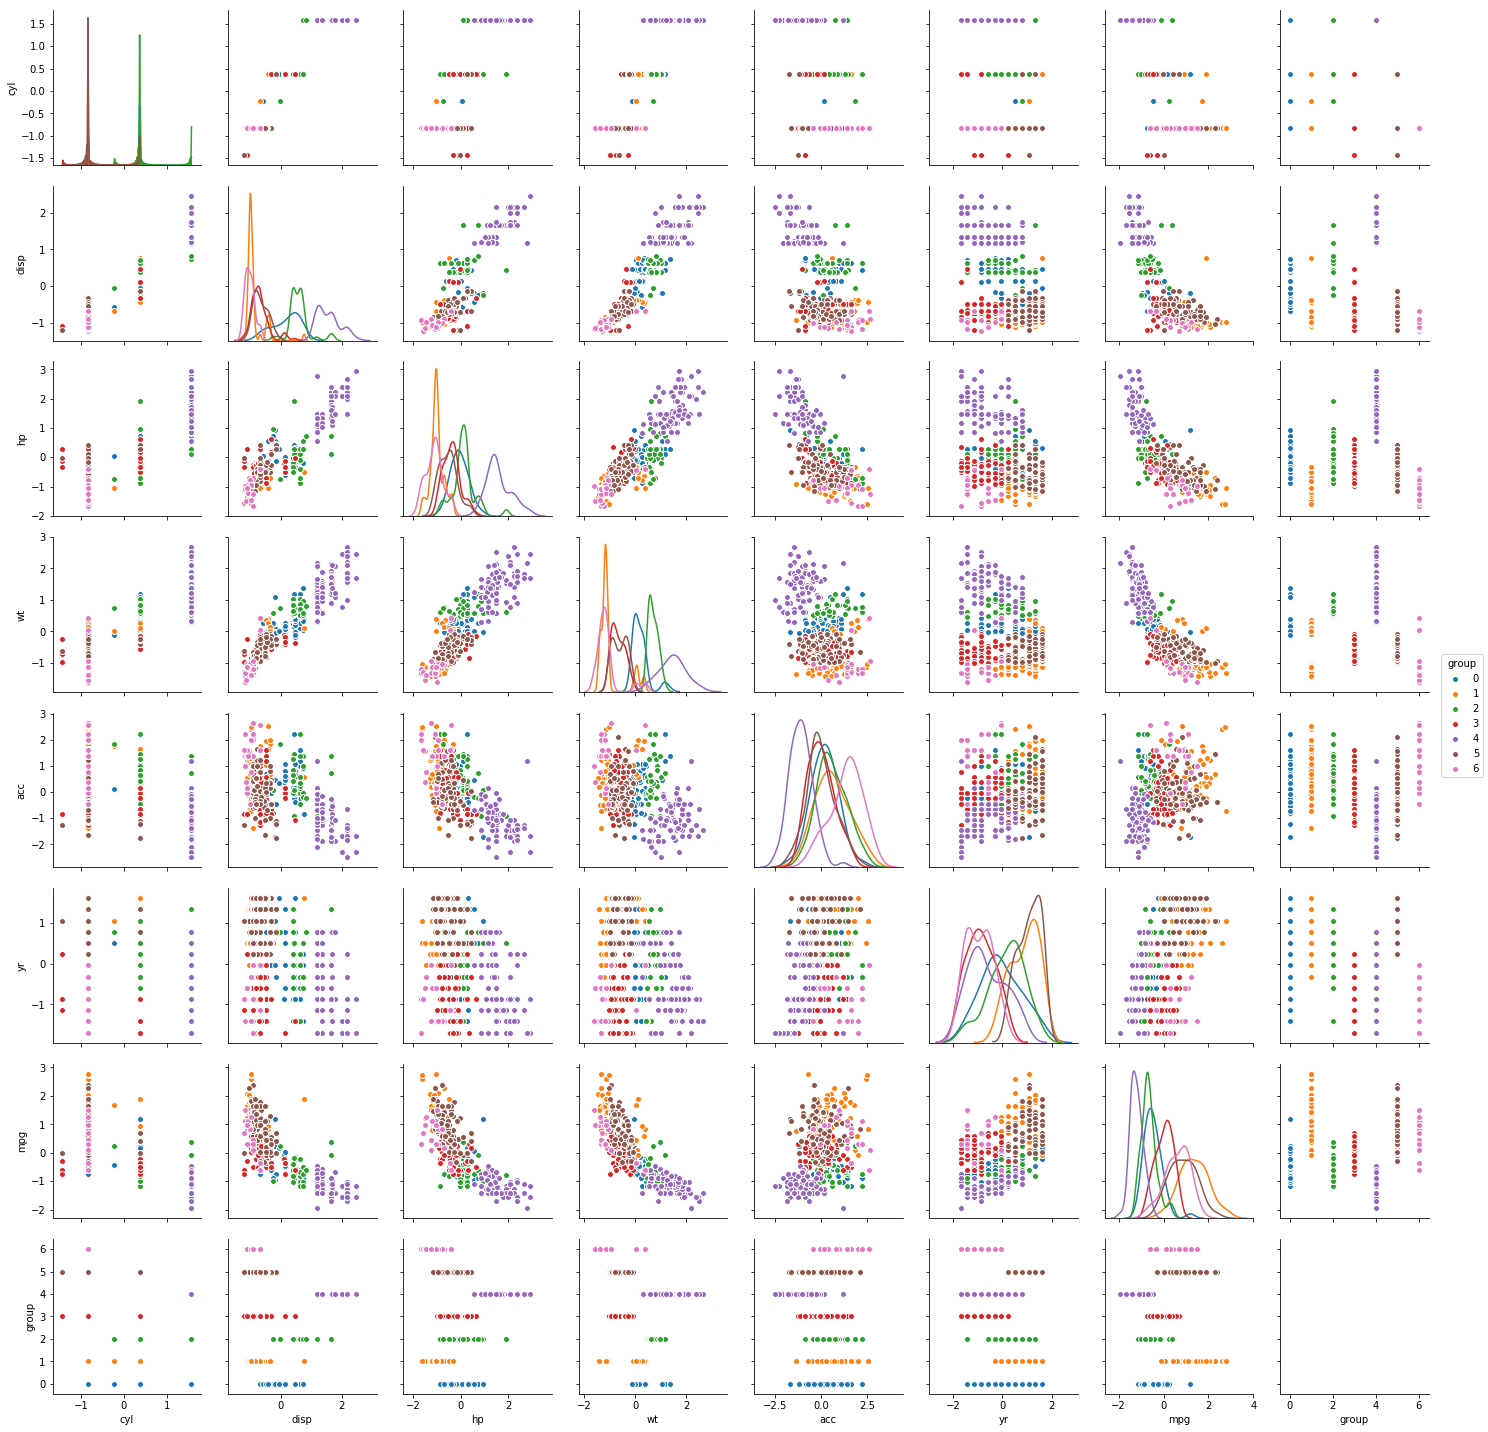

In [40]:
sns.pairplot(df_cars_z, diag_kind='kde',hue='group')

In [41]:
# From the pairplot, clustering seems to be similar to original dataset

In [42]:
df_cars_z.groupby('group').count()

,cyl,disp,hp,wt,acc,yr,mpg
group,,,,,,,
0,51,51,51,51,51,51,51
1,51,51,51,51,51,51,51
2,36,36,36,36,36,36,36
3,68,68,68,68,68,68,68
4,82,82,82,82,82,82,82
5,70,70,70,70,70,70,70
6,20,20,20,20,20,20,20


### Third iteration with Principal Component Analysis

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_cars_n)
df_cars_pca = scaler.transform(df_cars_n)

from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)
pca.fit(df_cars_pca)
df_cars_pca = pca.transform(df_cars_pca)

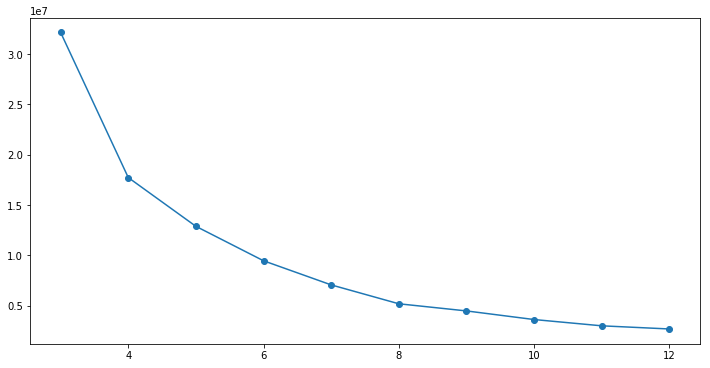

In [44]:
# Elbow plot
clusters_df_pca = get_clusters(df_cars_pca, cluster_range)
plt.figure(figsize=(12,6))
plt.plot(clusters_df_pca.num_clusters, clusters_df_pca.cluster_errors, marker = "o" )

In [45]:
# no of clusters could be 7
cluster_pca = KMeans(n_clusters=7, random_state=1)
cluster_pca.fit(df_cars_pca)
prediction_pca = cluster_pca.predict(df_cars_pca)

In [46]:
df_cars_npca = df_cars.drop('car name', axis=1)

In [47]:
df_cars_npca['group'] = prediction_pca

C:\AIML\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\AIML\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


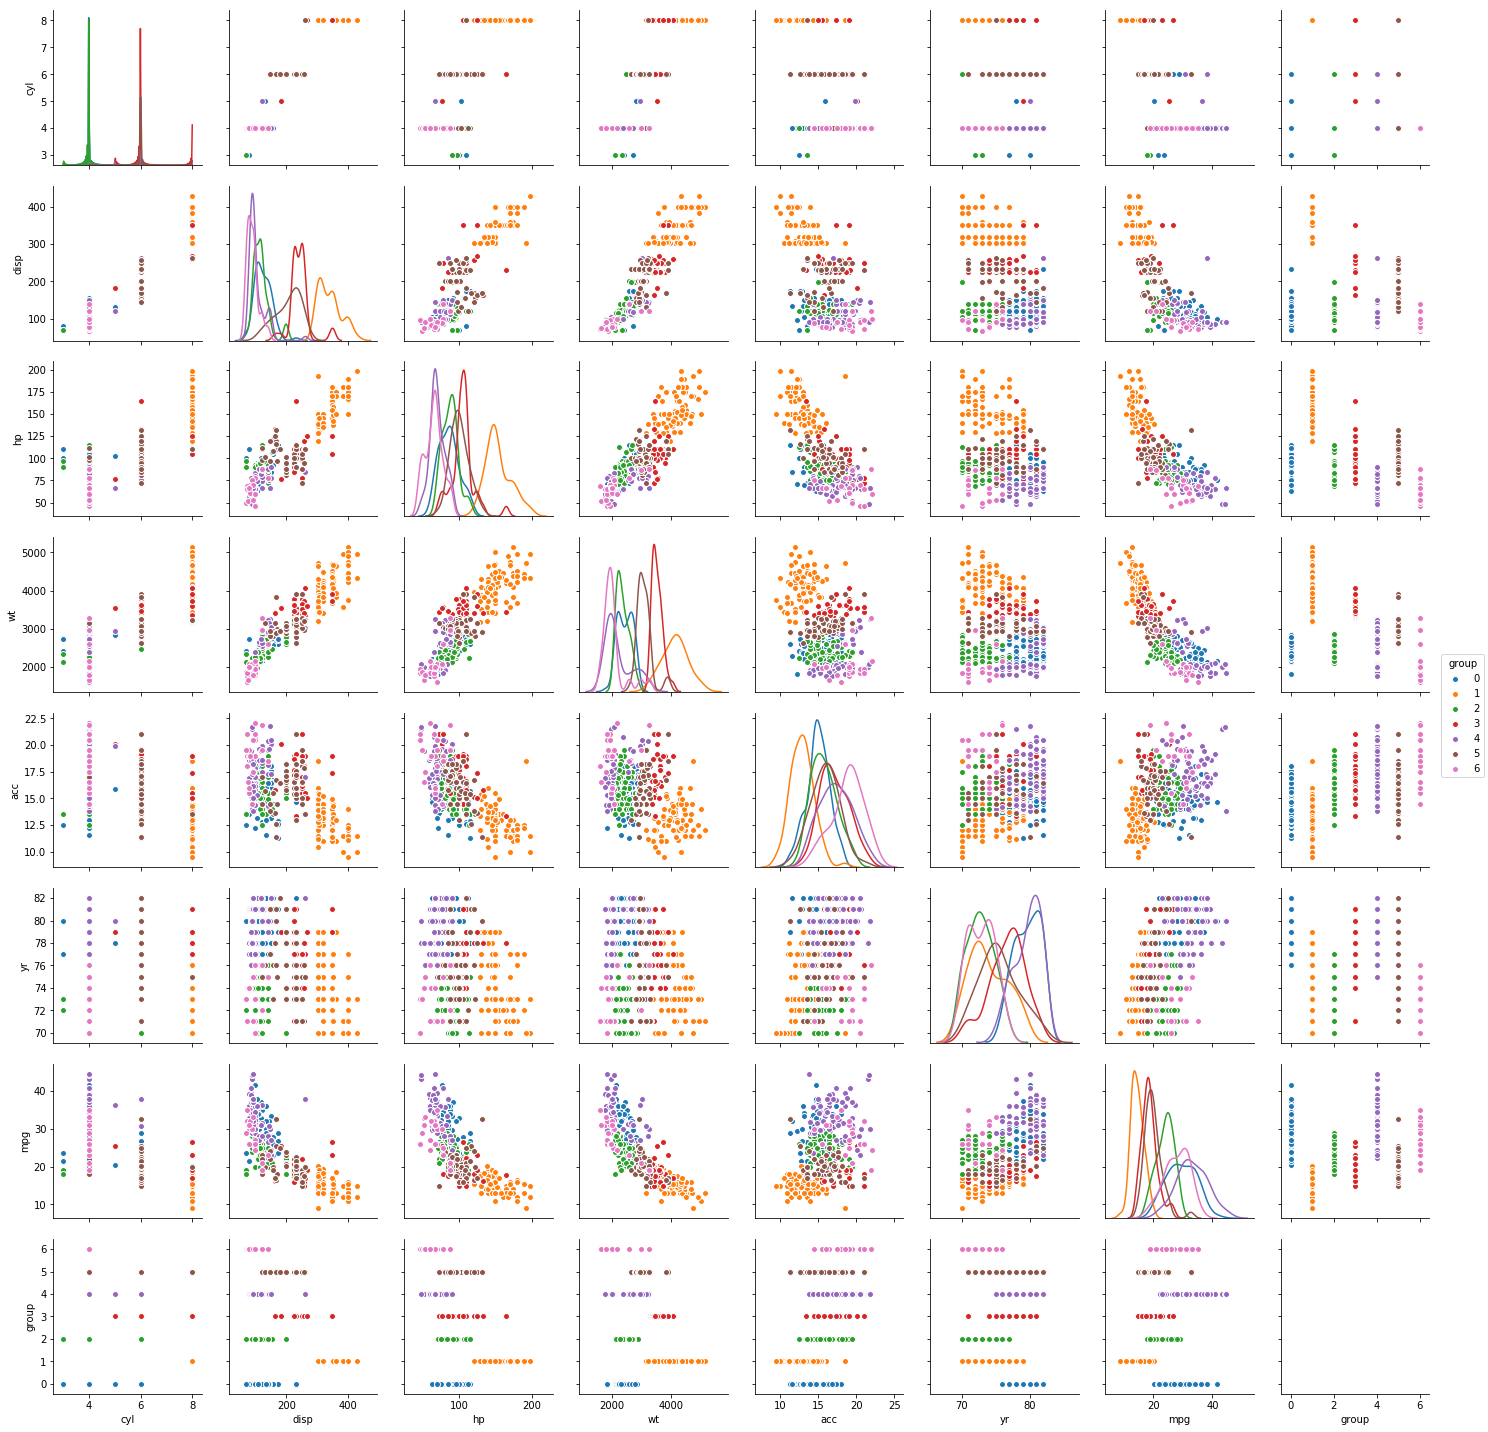

In [48]:
sns.pairplot(df_cars_npca, diag_kind='kde',hue='group')

In [49]:
df_cars_npca.groupby('group').count()

,cyl,disp,hp,wt,acc,yr,mpg
group,,,,,,,
0,69,69,69,69,69,69,69
1,83,83,83,83,83,83,83
2,61,61,61,61,61,61,61
3,36,36,36,36,36,36,36
4,60,60,60,60,60,60,60
5,48,48,48,48,48,48,48
6,21,21,21,21,21,21,21


## Use linear regression model on different clusters separately and print the coefficients of the models individually

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [51]:
def regression_on_clusters(df, no_of_clusters):
    for grp in range(no_of_clusters):
        df_grp = df[df['group'] == grp]
        X = df_grp[['cyl','disp','hp','wt','acc','yr']]
        Y = df_grp[['mpg']]
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=None)
        lr = LinearRegression()
        lr.fit(X_train, Y_train)
        Y_pred = lr.predict(X_test)
        print('----------CLUSTER ',grp,'--------------')
        print('R2 Score:',metrics.r2_score(Y_test, Y_pred))
        print('Coefficients:',lr.coef_)
        print('------------------------')

In [52]:
regression_on_clusters(df_cars_n, 7)

----------CLUSTER  0 --------------
R2 Score: 0.10297577413539116
Coefficients: [[ 1.0279249  -0.0474842  -0.08521249 -0.00682753 -0.41724761  0.44953296]]
------------------------
----------CLUSTER  1 --------------
R2 Score: 0.29424220144921365
Coefficients: [[ 0.         -0.06058366  0.09733004 -0.01062067  0.48162692  1.0335913 ]]
------------------------
----------CLUSTER  2 --------------
R2 Score: 0.2423323915425093
Coefficients: [[-0.09438492  0.00810937  0.00998702 -0.00104737  0.52903957  0.43336328]]
------------------------
----------CLUSTER  3 --------------
R2 Score: 0.5761838573903435
Coefficients: [[ 0.27614387 -0.01751435 -0.07666751 -0.00608281 -0.09626069  0.64067987]]
------------------------
----------CLUSTER  4 --------------
R2 Score: 0.18608471609806487
Coefficients: [[ 0.         -0.00078495  0.01678158 -0.00223455 -0.50143963  0.64107666]]
------------------------
----------CLUSTER  5 --------------
R2 Score: 0.7662515603868385
Coefficients: [[ 1.27610103e+01 

In [53]:
regression_on_clusters(df_cars_z, 7)

----------CLUSTER  0 --------------
R2 Score: 0.3535690576763414
Coefficients: [[ 0.13283825 -0.28499195 -0.16325599 -0.07070452 -0.14785906  0.17453289]]
------------------------
----------CLUSTER  1 --------------
R2 Score: -0.012073797217226012
Coefficients: [[ 1.30170479 -0.16044302  0.446124   -1.32412165  0.20052976  0.40051154]]
------------------------
----------CLUSTER  2 --------------
R2 Score: 0.11132372361494358
Coefficients: [[ 0.01695501  0.18904221 -0.12681052  0.01147059  0.00426965  0.32861496]]
------------------------
----------CLUSTER  3 --------------
R2 Score: 0.2660300572680694
Coefficients: [[ 0.22322293 -0.50036143 -0.28152664 -0.3313276  -0.05320175  0.12866352]]
------------------------
----------CLUSTER  4 --------------
R2 Score: 0.22567573274800112
Coefficients: [[ 0.         -0.12103788 -0.14731132 -0.12046854 -0.1660148   0.18258774]]
------------------------
----------CLUSTER  5 --------------
R2 Score: 0.3092259298690835
Coefficients: [[ 0.14114768 -1

In [54]:
regression_on_clusters(df_cars_npca, 7)

----------CLUSTER  0 --------------
R2 Score: 0.7213214257390488
Coefficients: [[ 0.94458515 -0.03287172 -0.11127648 -0.00529525 -0.47748146  1.14584292]]
------------------------
----------CLUSTER  1 --------------
R2 Score: 0.5178437139295174
Coefficients: [[ 0.00000000e+00 -1.03151237e-02 -2.69269744e-02 -2.53051243e-04
  -5.90286564e-01  3.52340463e-01]]
------------------------
----------CLUSTER  2 --------------
R2 Score: 0.04878714095137715
Coefficients: [[-0.27514578  0.00750237 -0.04735718 -0.00626017 -0.39990027  0.1435424 ]]
------------------------
----------CLUSTER  3 --------------
R2 Score: 0.40132041224647264
Coefficients: [[-0.44310412  0.00798768 -0.05665772  0.00481367 -0.47643038  0.60307663]]
------------------------
----------CLUSTER  4 --------------
R2 Score: 0.1801148857014646
Coefficients: [[ 3.6417786  -0.06611529 -0.11451908 -0.00626542  0.57305773  0.6520155 ]]
------------------------
----------CLUSTER  5 --------------
R2 Score: -0.10144691269834327
Coeff

### For clusters derived using z-score, R2 score is positive for all the clusters. For other data sets (original and PCA), as I am getting negative R2 score, the model is a bad fit for those datasets.

In [55]:
def regression_on_clusters_new(df, no_of_clusters):
    for grp in range(no_of_clusters):
        df_grp = df[df['group'] == grp]
        X = df_grp[['wt','acc','yr']]
        Y = df_grp[['mpg']]
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=None)
        lr = LinearRegression()
        lr.fit(X_train, Y_train)
        Y_pred = lr.predict(X_test)
        print('----------CLUSTER ',grp,'--------------')
        print('R2 Score:',metrics.r2_score(Y_test, Y_pred))
        print('Coefficients:',lr.coef_)
        print('------------------------')

In [56]:
df_cars_n.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,cyl,disp,hp,wt,acc,yr,mpg,group
cyl,1.0,0.96,0.86,0.89,-0.48,-0.3,-0.77,0.07
disp,0.96,1.0,0.89,0.94,-0.49,-0.31,-0.81,0.13
hp,0.86,0.89,1.0,0.88,-0.65,-0.35,-0.79,0.19
wt,0.89,0.94,0.88,1.0,-0.38,-0.26,-0.83,0.13
acc,-0.48,-0.49,-0.65,-0.38,1.0,0.22,0.36,-0.19
yr,-0.3,-0.31,-0.35,-0.26,0.22,1.0,0.55,-0.13
mpg,-0.77,-0.81,-0.79,-0.83,0.36,0.55,1.0,-0.15
group,0.07,0.13,0.19,0.13,-0.19,-0.13,-0.15,1.0


In [57]:
regression_on_clusters_new(df_cars_n, 7)

----------CLUSTER  0 --------------
R2 Score: -0.1075746598845746
Coefficients: [[-0.0086414   0.69999548  0.80354634]]
------------------------
----------CLUSTER  1 --------------
R2 Score: -0.04967591897936385
Coefficients: [[-0.01364382  0.77539643  1.17573351]]
------------------------
----------CLUSTER  2 --------------
R2 Score: -0.0805965418051724
Coefficients: [[-0.00138766  0.24827745  0.56617846]]
------------------------
----------CLUSTER  3 --------------
R2 Score: 0.5682155735905502
Coefficients: [[-0.01086858  0.24857275  0.68592403]]
------------------------
----------CLUSTER  4 --------------
R2 Score: 0.6531189296369568
Coefficients: [[-0.00216086 -0.41483293  0.55064172]]
------------------------
----------CLUSTER  5 --------------
R2 Score: 0.6672501111671036
Coefficients: [[-0.01294643 -0.23042954  0.97416589]]
------------------------
----------CLUSTER  6 --------------
R2 Score: 0.33938767420893434
Coefficients: [[-0.00175225  0.18540021  0.37405823]]
------------

In [58]:
regression_on_clusters_new(df_cars_z, 7)

----------CLUSTER  0 --------------
R2 Score: 0.5741060028578863
Coefficients: [[-0.40299772 -0.13604939  0.20189077]]
------------------------
----------CLUSTER  1 --------------
R2 Score: -0.14882538304723614
Coefficients: [[-7.78696331e-01  1.13971696e-04  4.72111256e-01]]
------------------------
----------CLUSTER  2 --------------
R2 Score: 0.27766807267537397
Coefficients: [[-0.16333962  0.04239482  0.22645527]]
------------------------
----------CLUSTER  3 --------------
R2 Score: 0.2025967689856154
Coefficients: [[-0.85662408 -0.08248872  0.17237156]]
------------------------
----------CLUSTER  4 --------------
R2 Score: 0.36425186557476585
Coefficients: [[-0.23192802 -0.08900368  0.16505782]]
------------------------
----------CLUSTER  5 --------------
R2 Score: 0.46134801110801227
Coefficients: [[-1.47304934 -0.00354096  0.40066411]]
------------------------
----------CLUSTER  6 --------------
R2 Score: 0.8228498627121292
Coefficients: [[-0.87665935 -0.12521945  0.03033111]]


In [59]:
regression_on_clusters_new(df_cars_npca, 7)

----------CLUSTER  0 --------------
R2 Score: 0.5544996856110158
Coefficients: [[-0.01258001 -0.00982332  1.22606379]]
------------------------
----------CLUSTER  1 --------------
R2 Score: 0.422256096962228
Coefficients: [[-0.00266211 -0.14844531  0.34437258]]
------------------------
----------CLUSTER  2 --------------
R2 Score: 0.4043058717031215
Coefficients: [[-0.00542419 -0.17874382  0.32592128]]
------------------------
----------CLUSTER  3 --------------
R2 Score: 0.18653109404884938
Coefficients: [[-5.23207734e-04  2.44206228e-01  5.78744836e-01]]
------------------------
----------CLUSTER  4 --------------
R2 Score: 0.5309145322568718
Coefficients: [[-0.00811361  0.60757537  0.72386945]]
------------------------
----------CLUSTER  5 --------------
R2 Score: 0.12377457713671125
Coefficients: [[-0.00260533 -0.57957677  0.67170051]]
------------------------
----------CLUSTER  6 --------------
R2 Score: 0.5102899317438075
Coefficients: [[-0.00925285 -0.0728672   0.4960539 ]]
----

### If we remove highly correlated variables from X and do Linear Regression, clusters derived from original dataset seems to better with positive R2 score for all the clusters. For other data sets (z-score and PCA), the model seems to be a bad fit.